---
# Chapter 1: Pre-*requisites*
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import torch
# import torch.nn.functional as F#for relu
from tensorflow.keras.datasets import fashion_mnist

Loading the data

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Some checking

In [3]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)



---
# ***Chapter 2: Preparing the data***
---


 ***Converting 2D pixels to 1D***



In [4]:
x_train = x_train.reshape(x_train.shape[0],-1)/255 #Creates 60000 rows of 784 coloumn wide Matrix
x_test = x_test.reshape(x_test.shape[0],-1)/255#Creates 60000 rows of 784 coloumn wide Matrix
x_train.shape,x_test.shape

((60000, 784), (10000, 784))



---


 ***One Hot Encoding***🔥


In [5]:
y_train_encoded = np.eye(10)[y_train]
y_test_encoded = np.eye(10)[y_test]

---

#**Chapter 3: The meat**

---

#***The Neural Network***



In [12]:
import numpy as np

class Neural_Network:
  def __init__(self,inputsize,hiddensize,outputsize,lr=0.01,ld1=0.0,ld2=0.0):
        self.W1 = np.random.randn(inputsize, hiddensize) * 0.01
        self.b1 = np.zeros((1, hiddensize))
        self.W2 = np.random.randn(hiddensize, outputsize) * 0.01
        self.b2 = np.zeros((1, outputsize))
        self.loss_history = []
        self.l1_lambda = ld1
        self.l2_lambda = ld2
        self.lr = lr
  # def sigmoid(self,x):
  #   return 1 / (1 + np.exp(-x))
  # def sigmoid_derivative(self,x):
  #   return x * (1 - x)

  def tanh(self,x):
    return np.tanh(x)
  # def tanh_derivative(self,x):
  #   return 1 - np.tanh(x) ** 2
  # def relu(self,x):
  #   for i in range(x.shape[0]):
  #     for j in range(x.shape[1]):
  #       if (x[i][j] < 0):
  #         x[i][j] = 0
  #   return x
  # def relu(self,x):
  #   return np.where(x > 0, 1, 0)
  def softmax(self,x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)
  def forward(self,x):
    self.z1=np.dot(x,self.W1)+self.b1
    self.a1=self.tanh(self.z1)
    self.z2=np.dot(self.a1,self.W2)+self.b2
    self.a2=self.softmax(self.z2)
    return self.a2
  def backward(self, X, y, output):
        m = X.shape[0]
        output_error = output - y
        hidden_error = np.dot(output_error, self.W2.T) * (1 - np.tanh(self.z1) ** 2)

        dW2 = np.dot(self.a1.T, output_error) / m
        db2 = np.sum(output_error, axis=0, keepdims=True) / m
        dW1 = np.dot(X.T, hidden_error) / m
        db1 = np.sum(hidden_error, axis=0, keepdims=True) / m


        # dW1 += self.l1_lambda * np.sign(self.W1)
        # dW2 += self.l1_lambda * np.sign(self.W2)


        dW1 += self.l2_lambda * self.W1
        dW2 += self.l2_lambda * self.W2

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
  def train(self, X, y, epochs, regularization_type="L2"):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # # Calculate loss with regularization penalties
            # if regularization_type == "L1":
            #     penalty = self.l1_lambda * (np.sum(np.abs(self.W1)) + np.sum(np.abs(self.W2)))
            # else:  # L2 Regularization by default
            #     penalty = self.l2_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))


            loss = -np.mean(np.sum(y * np.log(output + 1e-10), axis=1)) #+ penalty
            self.loss_history.append(loss)

            if epoch % 50 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
  def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)



#2


# import numpy as np

# class Neural_Network:
#     def __init__(self, inputsize, hiddensize, outputsize, lr=0.01, l2_lambda=0.01, dropout_rate=0.5):
#         self.inputsize = inputsize
#         self.hiddensize = hiddensize
#         self.outputsize = outputsize
#         self.lr = lr
#         self.l2_lambda = l2_lambda
#         self.dropout_rate = dropout_rate

#         # Initialize weights and biases
#         self.W1 = np.random.randn(self.inputsize, self.hiddensize) * np.sqrt(2.0 / inputsize)
#         self.b1 = np.zeros((1, self.hiddensize))
#         self.W2 = np.random.randn(self.hiddensize, self.outputsize) * np.sqrt(2.0 / hiddensize)
#         self.b2 = np.zeros((1, self.outputsize))

#         self.loss_history = []

#     def apply_dropout(self, layer_output, dropout_rate):
#         # Dropout mask
#         dropout_mask = np.random.binomial(1, 1 - dropout_rate, size=layer_output.shape)
#         return layer_output * dropout_mask / (1 - dropout_rate), dropout_mask

#     def forward(self, X, training=True):
#         # First layer forward pass
#         self.z1 = np.dot(X, self.W1) + self.b1
#         self.a1 = np.maximum(0, self.z1)  # ReLU activation

#         # Apply dropout only during training
#         if training:
#             self.a1, self.dropout_mask = self.apply_dropout(self.a1, self.dropout_rate)

#         # Second layer forward pass
#         self.z2 = np.dot(self.a1, self.W2) + self.b2
#         output = np.exp(self.z2) / np.sum(np.exp(self.z2), axis=1, keepdims=True)
#         return output

#     def backward(self, X, y, output):
#         # Calculate the loss gradient
#         m = X.shape[0]  # Number of examples
#         dz2 = output - y  # Gradient of the loss with respect to z2 (output layer pre-activation)

#         # Gradients for W2 and b2
#         dW2 = np.dot(self.a1.T, dz2) / m + self.l2_lambda * self.W2
#         db2 = np.sum(dz2, axis=0, keepdims=True) / m

#         # Backpropagate through the second layer
#         da1 = np.dot(dz2, self.W2.T)

#         # Apply ReLU derivative (only propagate where z1 > 0)
#         dz1 = da1 * (self.z1 > 0)

#         # Apply dropout mask during backpropagation
#         dz1 *= self.dropout_mask  # Skip the neurons dropped out during forward pass

#         # Gradients for W1 and b1
#         dW1 = np.dot(X.T, dz1) / m + self.l2_lambda * self.W1
#         db1 = np.sum(dz1, axis=0, keepdims=True) / m

#         # Update weights and biases
#         self.W1 -= self.lr * dW1
#         self.b1 -= self.lr * db1
#         self.W2 -= self.lr * dW2
#         self.b2 -= self.lr * db2

#     def train(self, X, y, epochs, regularization_type="L2"):
#         for epoch in range(epochs):
#             # Forward pass with dropout enabled during training
#             output = self.forward(X, training=True)

#             # Backpropagation
#             self.backward(X, y, output)

#             # Loss calculation with regularization penalty
#             if regularization_type == "L1":
#                 penalty = self.l2_lambda * (np.sum(np.abs(self.W1)) + np.sum(np.abs(self.W2)))
#             else:  # Default to L2 regularization
#                 penalty = self.l2_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))

#             # Cross-entropy loss
#             loss = -np.mean(np.sum(y * np.log(output + 1e-10), axis=1)) + penalty
#             self.loss_history.append(loss)

#             if epoch % 10 == 0:
#                 print(f"Epoch {epoch}, Loss: {loss:.4f}")

#     def predict(self, X):
#         # During prediction, dropout is disabled
#         output = self.forward(X, training=False)
#         return np.argmax(output, axis=1)


#3

# class Neural_Network:
#     def __init__(self, inputsize, hiddensize, outputsize, lr=0.01, l1_lambda=0.01, l2_lambda=0.01, dropout_rate=0.5, alpha=0.5):
#         self.inputsize = inputsize
#         self.hiddensize = hiddensize
#         self.outputsize = outputsize
#         self.lr = lr
#         self.l1_lambda = l1_lambda  # L1 regularization factor (Lasso)
#         self.l2_lambda = l2_lambda  # L2 regularization factor (Ridge)
#         self.alpha = alpha  # Mix between L1 and L2 regularization
#         self.dropout_rate = dropout_rate

#         # Initialize weights and biases
#         self.W1 = np.random.randn(self.inputsize, self.hiddensize) * np.sqrt(2.0 / inputsize)
#         self.b1 = np.zeros((1, self.hiddensize))
#         self.W2 = np.random.randn(self.hiddensize, self.outputsize) * np.sqrt(2.0 / hiddensize)
#         self.b2 = np.zeros((1, self.outputsize))

#         self.loss_history = []

#     def apply_dropout(self, layer_output, dropout_rate):
#         dropout_mask = np.random.binomial(1, 1 - dropout_rate, size=layer_output.shape)
#         return layer_output * dropout_mask / (1 - dropout_rate), dropout_mask

#     def forward(self, X, training=True):
#         # First layer forward pass
#         self.z1 = np.dot(X, self.W1) + self.b1
#         self.a1 = np.maximum(0, self.z1)  # ReLU activation

#         # Apply dropout only during training
#         if training:
#             self.a1, self.dropout_mask = self.apply_dropout(self.a1, self.dropout_rate)

#         # Second layer forward pass
#         self.z2 = np.dot(self.a1, self.W2) + self.b2
#         output = np.exp(self.z2) / np.sum(np.exp(self.z2), axis=1, keepdims=True)
#         return output

#     def backward(self, X, y, output):
#         m = X.shape[0]
#         dz2 = output - y  # Gradient of the loss with respect to z2 (output layer pre-activation)

#         # Gradients for W2 and b2
#         dW2 = np.dot(self.a1.T, dz2) / m
#         db2 = np.sum(dz2, axis=0, keepdims=True) / m

#         da1 = np.dot(dz2, self.W2.T)
#         dz1 = da1 * (self.z1 > 0)  # Backprop through ReLU
#         dz1 *= self.dropout_mask  # Apply dropout mask during backpropagation

#         # Gradients for W1 and b1
#         dW1 = np.dot(X.T, dz1) / m
#         db1 = np.sum(dz1, axis=0, keepdims=True) / m

#         # Apply ElasticNet regularization
#         dW1 += self.alpha * self.l1_lambda * np.sign(self.W1) + (1 - self.alpha) * self.l2_lambda * self.W1
#         dW2 += self.alpha * self.l1_lambda * np.sign(self.W2) + (1 - self.alpha) * self.l2_lambda * self.W2

#         # Update weights and biases
#         self.W1 -= self.lr * dW1
#         self.b1 -= self.lr * db1
#         self.W2 -= self.lr * dW2
#         self.b2 -= self.lr * db2

#     def train(self, X, y, epochs):
#         for epoch in range(epochs):
#             output = self.forward(X, training=True)  # Forward pass with dropout
#             self.backward(X, y, output)  # Backpropagation

#             # Calculate loss with ElasticNet regularization penalty
#             penalty = self.alpha * self.l1_lambda * (np.sum(np.abs(self.W1)) + np.sum(np.abs(self.W2))) + \
#                       (1 - self.alpha) * self.l2_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))

#             # Cross-entropy loss
#             loss = -np.mean(np.sum(y * np.log(output + 1e-10), axis=1)) + penalty
#             self.loss_history.append(loss)

#             if epoch % 100 == 0:
#                 print(f"Epoch {epoch}, Loss: {loss:.4f}")

#     def predict(self, X):
#         output = self.forward(X, training=False)
#         return np.argmax(output, axis=1)




In [13]:
# nn_l1 = Neural_Network(inputsize=784, hiddensize=128, outputsize=10, lr=0.01, ld1=0.01)
nn_l2 = Neural_Network(inputsize=784, hiddensize=64, outputsize=10, lr=0.1, ld2=0.05)
epochs = 1000
# nn_l1.train(x_train, y_train_encoded, epochs=epochs, regularization_type="L1")
nn_l2.train(x_train, y_train_encoded, epochs=epochs, regularization_type="L2")

#2
# nn = Neural_Network(inputsize=784, hiddensize=512, outputsize=10, lr=0.01, l2_lambda=0.01, dropout_rate=0.5)
# nn.train(x_train, y_train_encoded, epochs=100)

#3

# nn_elasticnet = Neural_Network(inputsize=784, hiddensize=1024, outputsize=10, lr=0.01, l1_lambda=0.01, l2_lambda=0.01, dropout_rate=0.5, alpha=0.5)
# nn_elasticnet.train(x_train, y_train_encoded, epochs=1000)


Epoch 0, Loss: 2.3029
Epoch 50, Loss: 1.5233
Epoch 100, Loss: 1.1215
Epoch 150, Loss: 0.9640
Epoch 200, Loss: 0.8911
Epoch 250, Loss: 0.8509
Epoch 300, Loss: 0.8245
Epoch 350, Loss: 0.8053
Epoch 400, Loss: 0.7904
Epoch 450, Loss: 0.7787
Epoch 500, Loss: 0.7692
Epoch 550, Loss: 0.7616
Epoch 600, Loss: 0.7553
Epoch 650, Loss: 0.7501
Epoch 700, Loss: 0.7458
Epoch 750, Loss: 0.7422
Epoch 800, Loss: 0.7391
Epoch 850, Loss: 0.7365
Epoch 900, Loss: 0.7342
Epoch 950, Loss: 0.7323


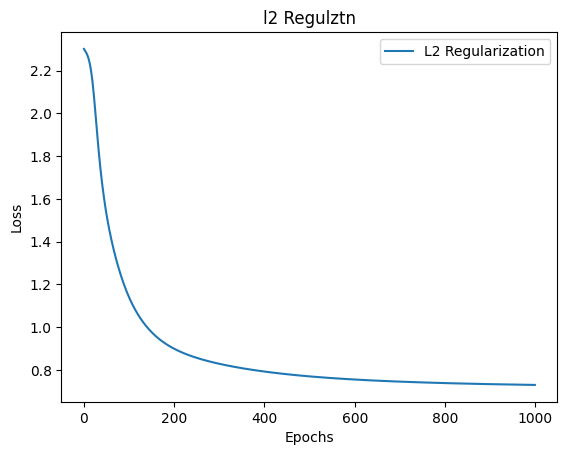

In [10]:
# plt.plot(nn_l1.loss_history, label='L1 Regularization')
plt.plot(nn_l2.loss_history, label='L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('l2 Regulztn')
plt.legend()
plt.show()




In [11]:
predictions = nn_l2.predict(x_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")



Test Accuracy: 0.7737
